<a href="https://colab.research.google.com/github/tomasjoseph95/projects-assignments/blob/main/case%20study%20cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [5]:
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
x = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']]

#clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [11]:
wcss

[157595857524.96133,
 113217528878.79834,
 80333265953.4602,
 64855545845.90139,
 53006618758.42124,
 46922612535.91846,
 41209662389.51964,
 36662831928.69667,
 32928724755.459854,
 29673647089.989082]

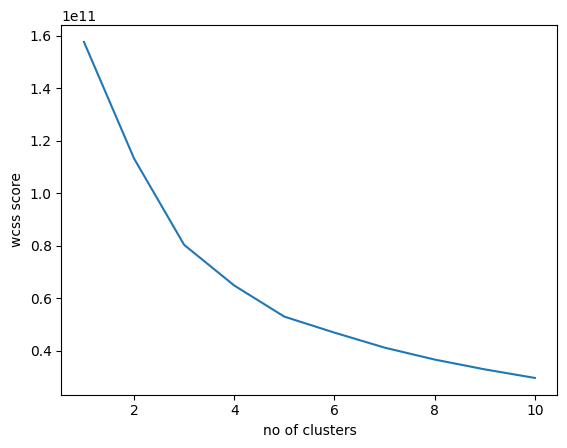

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.show()

In [17]:
km = KMeans(n_clusters=4,n_init=20)
km.fit(x)

KMeans(n_clusters=4, n_init=20)

In [18]:
cluster_labels = km.labels_

In [19]:
cluster_labels

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 3, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 3,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 3, 2,
       1, 2, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 2, 0, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

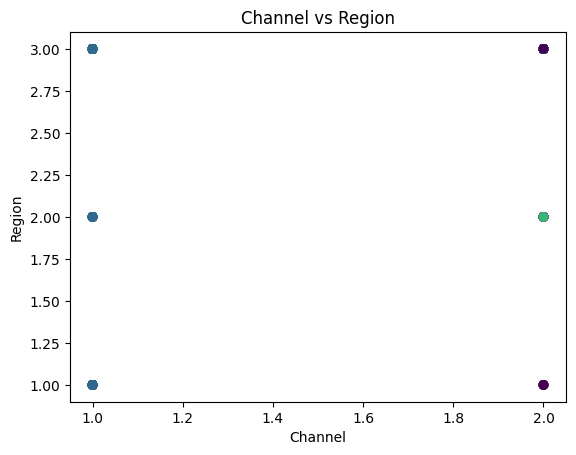

In [20]:
plt.scatter(x['Channel'],x['Region'],c=cluster_labels)
plt.xlabel('Channel')
plt.ylabel('Region')
plt.title('Channel vs Region')
plt.show()

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
mergings = linkage(x,method = 'ward')

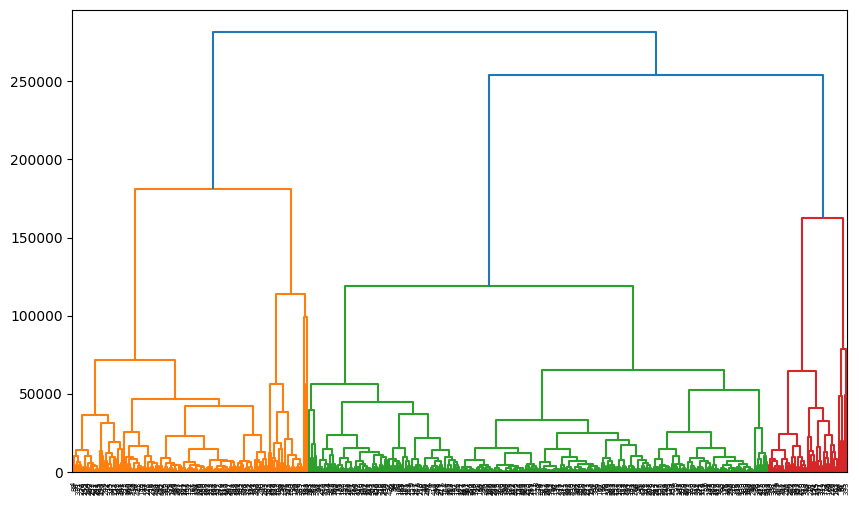

In [23]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

#PCA

In [24]:
import seaborn as sns

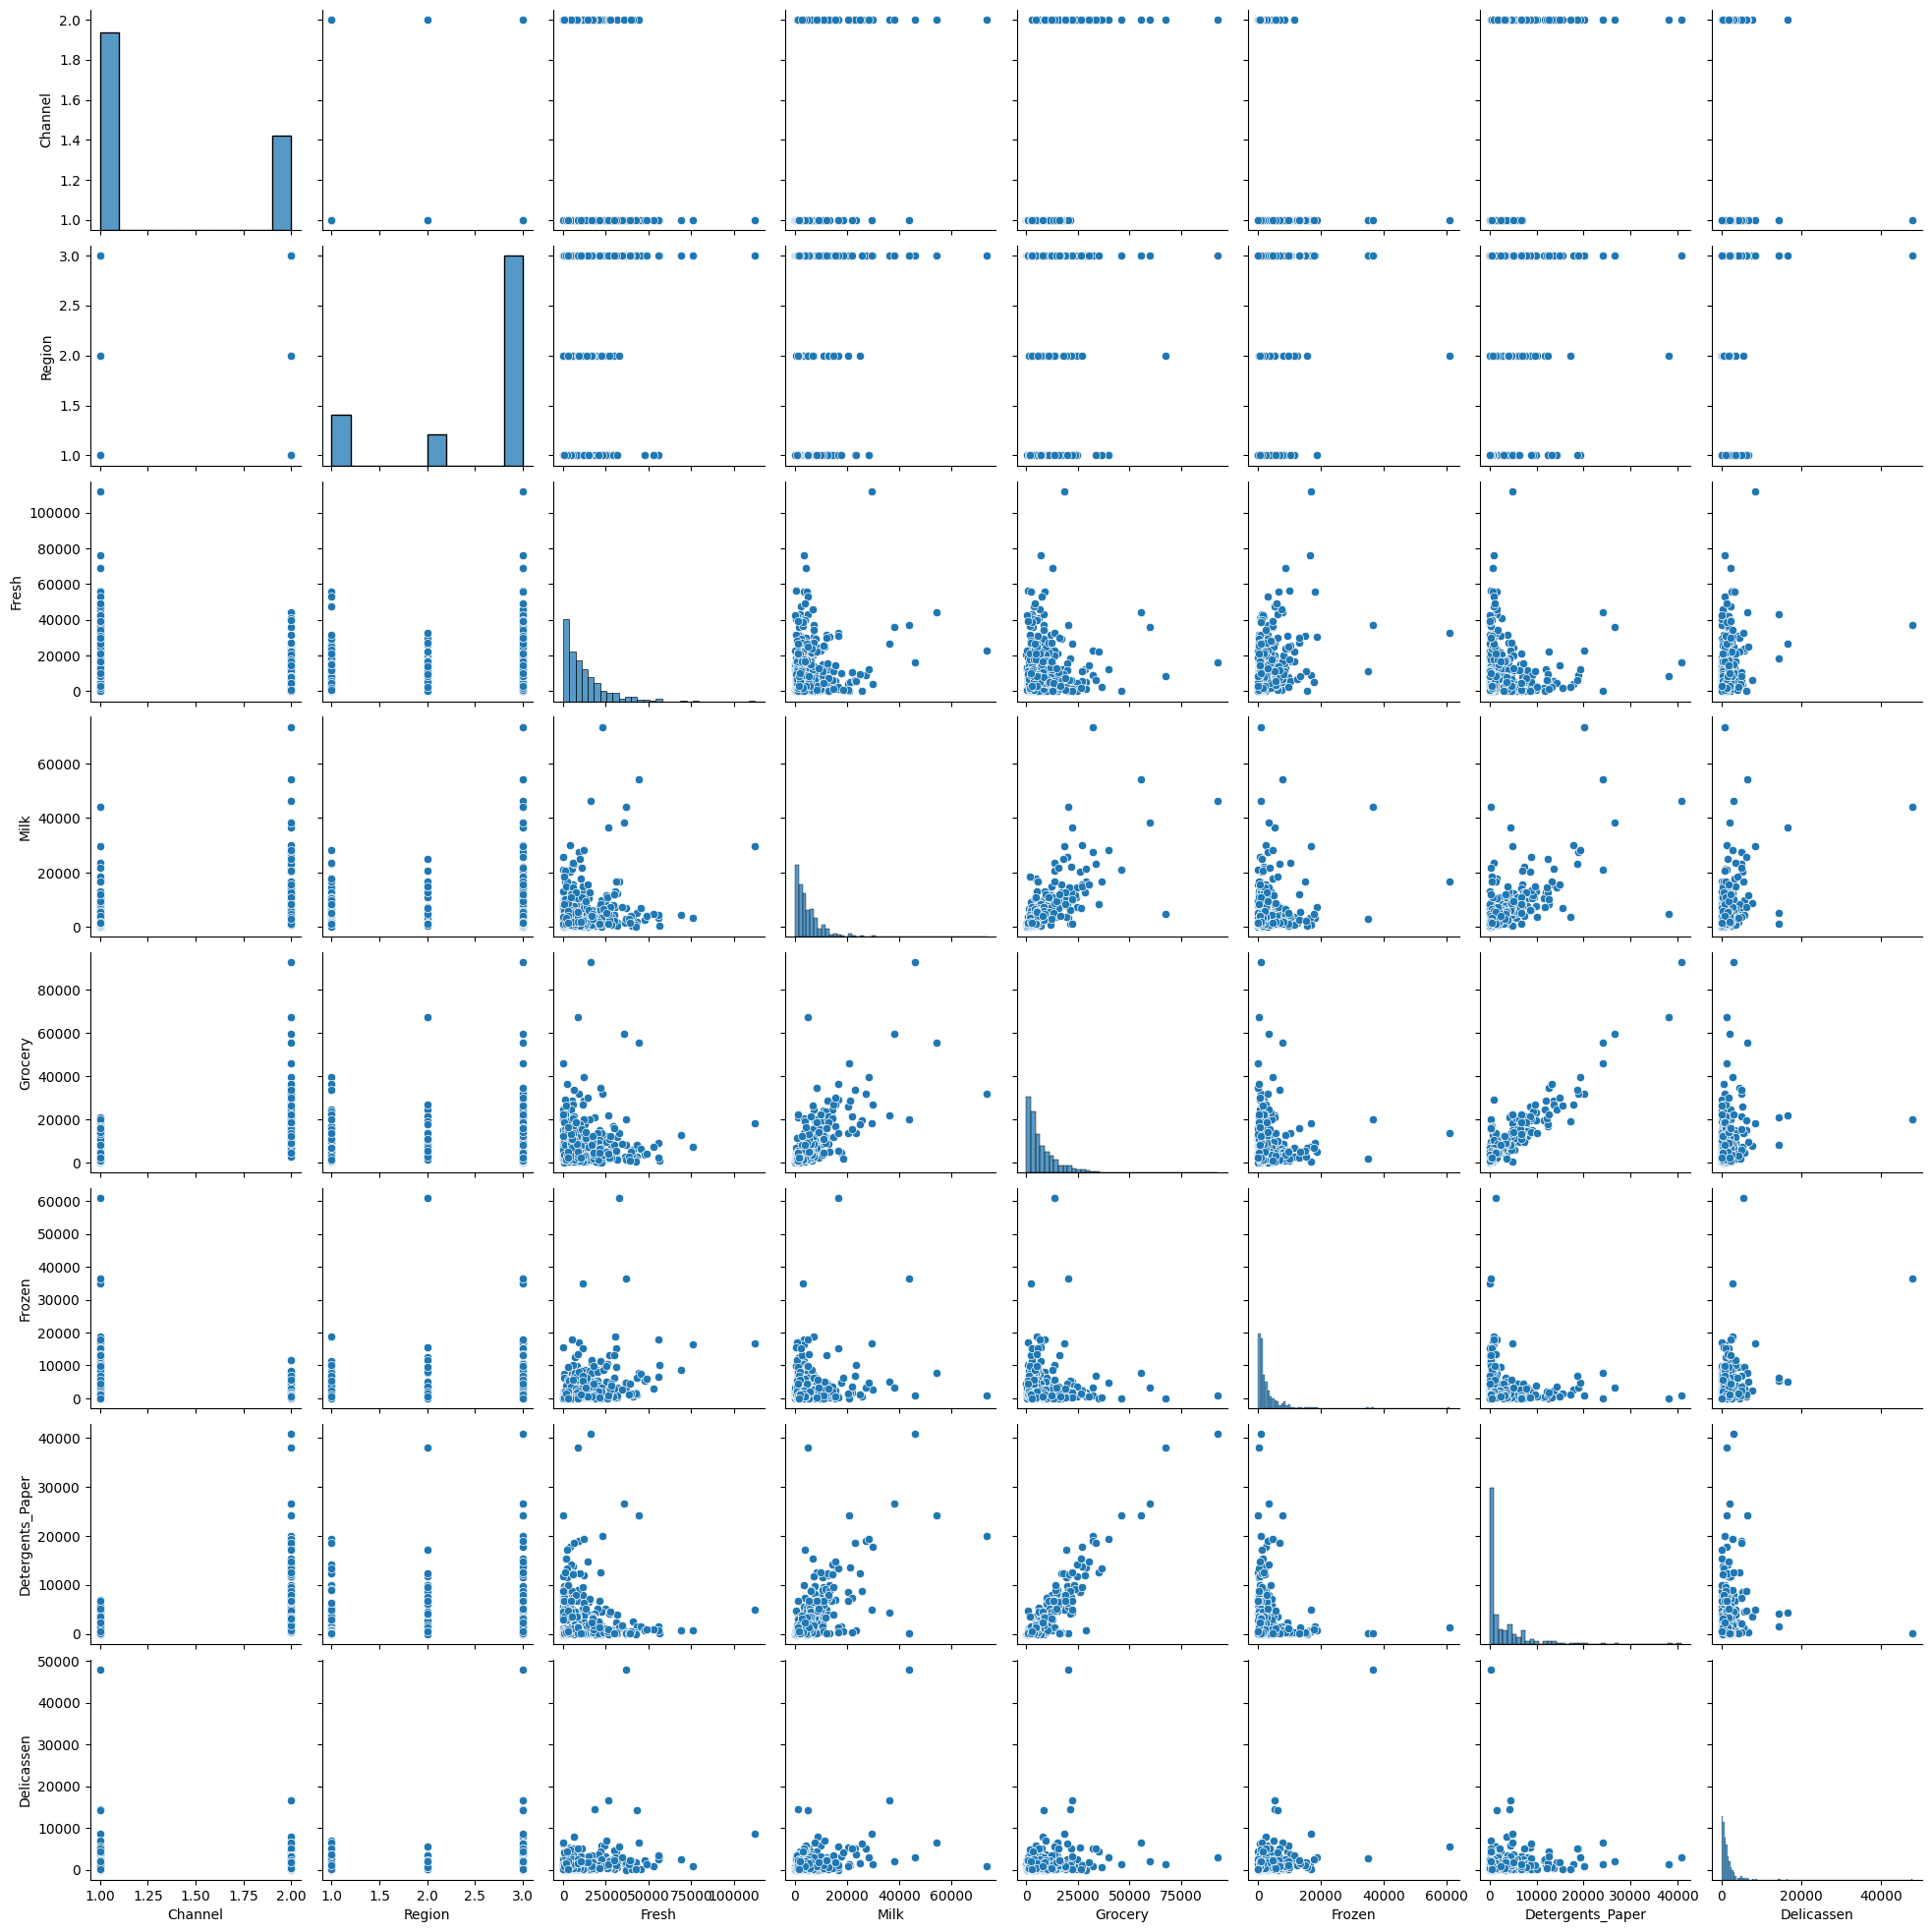

In [25]:
sns.pairplot(data)

In [26]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [28]:
data_index = data.index

In [29]:
data.index

RangeIndex(start=0, stop=440, step=1)

In [30]:
from sklearn.preprocessing import scale

In [31]:
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

#scaling

In [32]:
x = pd.DataFrame(scale(data),index = data.index,columns = data.columns)

In [34]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [35]:
from sklearn.decomposition import PCA

In [36]:
pc = PCA()

In [37]:
pc_array = pc.fit_transform(x)

In [38]:
pc_array.shape

(440, 8)

In [39]:
pc = PCA(n_components=6)

In [40]:
pc_array = pc.fit_transform(x)

In [41]:
pc_array.shape

(440, 6)

In [43]:
pc_data = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3","pc4","pc5","pc6"])

In [44]:
pc_data

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372
...,...,...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036,1.109212,0.364851
436,-1.290172,1.560397,-0.756171,-1.342401,-0.533462,-0.205789
437,3.865149,-0.479854,-0.525345,-0.687132,0.108968,0.280320
438,-1.097067,-0.069896,-0.630128,0.311821,-0.424792,0.335170


In [45]:
pc.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354])